In [1]:
import matplotlib.pyplot as plt
import numpy as np
from svdutils_Zhicai import train_model, get_err, train_model_bias, get_err_bias

In [2]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies

## Task 1: use the code from homework 5

In [3]:
train_model(M, N, 20, 0.03, 0.12, Y_train, 1e-5, 300, True)

Initial error = 6.9180975279455375
After epoch: 0, error = 0.5000699286023484, eps = 0.9277156867791579
After epoch: 1, error = 0.4342149917584362, eps = 0.010260930764874202
After epoch: 2, error = 0.4152182372777319, eps = 0.0029599053894140957
After epoch: 3, error = 0.39665684594209333, eps = 0.002892070974817575
After epoch: 4, error = 0.3886882925949242, eps = 0.0012415891368221298
After epoch: 5, error = 0.3830434354039598, eps = 0.0008795314609650636
After epoch: 6, error = 0.37485608025186834, eps = 0.001275680888771706
After epoch: 7, error = 0.3679563050833031, eps = 0.0010750616231802006
After epoch: 8, error = 0.3631916956635816, eps = 0.0007423790792375392
After epoch: 9, error = 0.365995548414759, eps = 0.00043687140757455383
After epoch: 10, error = 0.356179819325788, eps = 0.001529399638290044
After epoch: 11, error = 0.3523932538624742, eps = 0.0005899889654106983
After epoch: 12, error = 0.34880273984613125, eps = 0.0005594419719713295
After epoch: 13, error = 0.3473

(array([[ 0.04769125,  0.434301  , -0.12319558, ..., -0.72516245,
         -0.72517747,  0.21054406],
        [-0.39380902,  0.70011498, -0.08234387, ..., -0.43208216,
         -0.88016893,  0.19213989],
        [-0.62205755,  0.23867924,  0.38462837, ..., -0.04889735,
         -0.54138122,  0.22437074],
        ...,
        [-0.20920095,  0.57386861,  0.20273295, ..., -0.40652077,
         -1.02012908, -0.1316605 ],
        [-0.29452913,  0.40278357, -0.01055302, ..., -0.45548395,
         -0.99405291, -0.08634439],
        [-0.72506309,  0.50681052,  0.32144616, ..., -0.53206946,
         -0.64213369,  0.27160957]]),
 array([[-0.38116929,  0.40053915,  0.11106199, ..., -0.5372568 ,
         -1.07390957,  0.08983654],
        [-0.28932393,  0.45379836,  0.15374852, ..., -0.7119425 ,
         -0.8930071 ,  0.10265727],
        [-0.09073358, -0.01814441,  0.27836195, ..., -0.72461687,
         -0.59189784,  0.49659657],
        ...,
        [-0.30242478,  0.18973352, -0.33465213, ..., -

In [4]:
## scan E_in and E_out for different lambda
regs = [10**-3, 10**-2, 0.06, 0.08, 10**-1, 0.12, 0.14, 0.20, 1.0]
eta = 0.03
K = 20
E_ins_vs_lambda = np.zeros(len(regs))
E_outs_vs_lambda = np.zeros(len(regs))

for idx in range(len(regs)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, regs[idx]))
    U,V, e_in = train_model(M, N, K, eta, regs[idx], Y_train)
    E_ins_vs_lambda[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_lambda[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
E_in = 0.2366, E_out = 0.6906
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01
E_in = 0.2073, E_out = 0.5827
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.06
E_in = 0.2477, E_out = 0.4681
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.08
E_in = 0.2571, E_out = 0.4393
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.3018, E_out = 0.4482
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.12
E_in = 0.3620, E_out = 0.4581
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.14
E_in = 0.3482, E_out = 0.4495
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.2
E_in = 0.4232, E_out = 0.4749
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 1.0
E_in = 0.9405, E_out = 0.9582


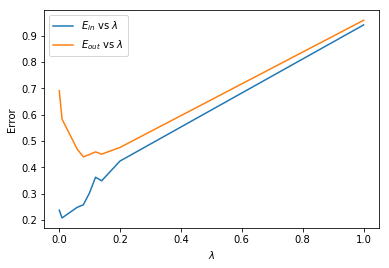

In [5]:
#plot E_in and E_out vs. lambda
plt.plot(regs, E_ins_vs_lambda, label='$E_{in}$ vs $\lambda$')
plt.plot(regs, E_outs_vs_lambda, label='$E_{out}$ vs $\lambda$')
plt.xlabel('$\lambda$')
plt.ylabel('Error')
plt.legend()
plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.pdf')
plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.png')

In [6]:
print(np.argmin(E_ins_vs_lambda))
print(regs[np.argmin(E_ins_vs_lambda)])
print(np.argmin(E_outs_vs_lambda))
print(regs[np.argmin(E_outs_vs_lambda)])

1
0.01
3
0.08


In [7]:
## scan E_in and E_out for different eta
## scan E_in and E_out for different lambda
reg = 0.10
etas = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
K = 20
E_ins_vs_eta = np.zeros(len(etas))
E_outs_vs_eta = np.zeros(len(etas))

for idx in range(len(etas)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, etas[idx], reg))
    U,V, e_in = train_model(M, N, K, etas[idx], reg, Y_train)
    E_ins_vs_eta[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_eta[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.001, reg = 0.1
E_in = 0.3013, E_out = 0.4237
Training model with M = 943, N = 1682, k = 20, eta = 0.01, reg = 0.1
E_in = 0.3040, E_out = 0.4340
Training model with M = 943, N = 1682, k = 20, eta = 0.02, reg = 0.1
E_in = 0.2879, E_out = 0.4343
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.2875, E_out = 0.4430
Training model with M = 943, N = 1682, k = 20, eta = 0.04, reg = 0.1
E_in = 0.2967, E_out = 0.4586
Training model with M = 943, N = 1682, k = 20, eta = 0.05, reg = 0.1
E_in = 0.3360, E_out = 0.4742
Training model with M = 943, N = 1682, k = 20, eta = 0.1, reg = 0.1
E_in = 0.3852, E_out = 0.5299


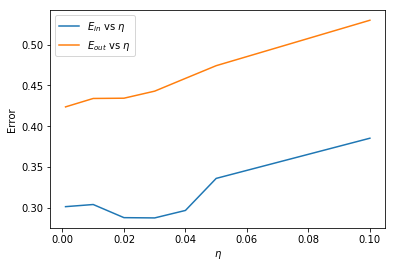

In [8]:
#plot E_in and E_out vs. eta
plt.clf()
plt.plot(etas, E_ins_vs_eta, label='$E_{in}$ vs $\eta$')
plt.plot(etas, E_outs_vs_eta, label='$E_{out}$ vs $\eta$')
plt.xlabel('$\eta$')
plt.ylabel('Error')
plt.legend()
plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.pdf')
plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.png')

In [9]:
print(np.argmin(E_ins_vs_eta))
print(regs[np.argmin(E_ins_vs_eta)])
print(np.argmin(E_outs_vs_eta))
print(regs[np.argmin(E_outs_vs_eta)])

3
0.08
0
0.001


In [10]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT, VT, e_in = train_model(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err(UT, VT, Y_test)

Initial error = 6.929805224042088
After epoch: 0, error = 0.4998904504126567, eps = 0.9278637083942345
After epoch: 1, error = 0.4311332208506442, eps = 0.010693334512613104
After epoch: 2, error = 0.40431131970611045, eps = 0.004171424052856281
After epoch: 3, error = 0.38682522359776095, eps = 0.0027194911167507277
After epoch: 4, error = 0.3744548148921328, eps = 0.0019238837746904634
After epoch: 5, error = 0.36382778467404037, eps = 0.0016527482233009256
After epoch: 6, error = 0.3564140413518085, eps = 0.0011530080231603316
After epoch: 7, error = 0.34519075301250646, eps = 0.0017454801089014948
After epoch: 8, error = 0.3425880182378913, eps = 0.00040478526796180304
After epoch: 9, error = 0.3322951228356149, eps = 0.0016007825553909284
After epoch: 10, error = 0.3253568580707013, eps = 0.0010790601445246264
After epoch: 11, error = 0.32201832019097143, eps = 0.0005192196160082854
After epoch: 12, error = 0.3174384473433219, eps = 0.0007122758246240938
After epoch: 13, error = 0

In [11]:
## read the movies.txt file, get the list of all movies ids, names, and their genres
ratings_all = np.loadtxt('data/data.txt')
movies_all = []
with open('data/movies.txt') as f:
    lines = f.readlines()  
    for line in lines:
        line_items = line.strip('\n').split(';')
        line_items_int_str = []
        for idx in range(len(line_items)):
            if idx == 1:
                line_items_int_str.append(line_items[idx][0:line_items[idx].find('(')]) #remove the year of the movie from the name
            else:
                line_items_int_str.append(int(line_items[idx]))
        movies_all.append(line_items_int_str)

In [49]:
## 10 random movies, 10 most popular movies, and 10 best movies
average_ratings_all = np.zeros(len(movies_all))
num_of_ratings_all = np.zeros(len(movies_all))
for rating in ratings_all:
    num_of_ratings_all[int(rating[1])-1] += 1
    average_ratings_all[int(rating[1])-1] += rating[2]
average_ratings_all = np.divide(average_ratings_all, num_of_ratings_all)
id_most_popular_10 = num_of_ratings_all.argsort()[-10:][::-1]
id_best_10 = average_ratings_all.argsort()[-10:][::-1]

name_most_popular_10 = []
for idx in range(len(id_most_popular_10)):
    name_most_popular_10.append(movies_all[id_most_popular_10[idx]][1])
    
name_best_10 = []
for idx in range(len(id_best_10)):
    name_best_10.append(movies_all[id_best_10[idx]][1])
    #print(average_ratings_all[id_best_10[idx]])
    #print(num_of_ratings_all[id_best_10[idx]])

## 10 random movies
id_all = np.arange(len(movies_all))
np.random.shuffle(id_all)
id_random10 = id_all[:10]
name_random10 = []
for idx in range(len(id_random10)):
    name_random10.append(movies_all[id_random10[idx]][1])

## 10 random movies of genre = action
print(id_all)
id_random_action = []
id_random_documentary = []
id_random_drama = []
name_random_action = []
name_random_documentary = []
name_random_drama = []

for idx in id_all:
    if movies_all[idx][3] == 1 and num_of_ratings_all[idx] > 50:
        id_random_action.append(idx)
        name_random_action.append(movies_all[idx][1])
    if movies_all[idx][9] == 1 and num_of_ratings_all[idx] > 20:
        id_random_documentary.append(idx)
        name_random_documentary.append(movies_all[idx][1])
    if movies_all[idx][10] == 1 and num_of_ratings_all[idx] > 50:
        id_random_drama.append(idx)
        name_random_drama.append(movies_all[idx][1])

id_random10_action = id_random_action[:10]
name_random10_action = name_random_action[:10]
id_random10_documentary = id_random_documentary[:10]
name_random10_documentary = name_random_documentary[:10]
id_random10_drama = id_random_drama[:10]
name_random10_drama = name_random_drama[:10]

print('10 random movies')
print(id_random10)
print(name_random10)
print('10 random action movies')
print(id_random10_action)
print(name_random10_action)
print('10 random documentary movies')
print(id_random10_documentary)
print(name_random10_documentary)
print('10 random drama movies')
print(id_random10_drama)
print(name_random10_drama)

print('10 most popular movies')
print(id_most_popular_10)
print(name_most_popular_10)
print('10 best movies')
print(id_best_10)
print(name_best_10)

[1225 1036 1365 ...  567  599 1297]
10 random movies
[1225 1036 1365  802 1328  411  815  947 1075 1437]
['Night Falls on Manhattan ', 'Grease 2 ', 'JLG/JLG - autoportrait de dÈcembre ', 'Heaven & Earth ', 'Low Life, The ', 'Very Brady Sequel, A ', 'Candyman: Farewell to the Flesh ', 'Booty Call ', 'Pagemaster, The ', 'Panther ']
10 random action movies
[270, 630, 200, 32, 430, 678, 509, 635, 230, 95]
['Starship Troopers ', 'Crying Game, The ', 'Evil Dead II ', 'Desperado ', 'Highlander ', 'Conan the Barbarian ', 'Magnificent Seven, The ', 'Escape from New York ', 'Batman Returns ', 'Terminator 2: Judgment Day ']
10 random documentary movies
[644, 1021, 1064, 633, 812, 31, 1083, 846, 643, 1141]
['Paris Is Burning ', 'Fast, Cheap & Out of Control ', 'Koyaanisqatsi ', "Microcosmos: Le peuple de l'herbe ", 'Celluloid Closet, The ', 'Crumb ', 'Anne Frank Remembered ', 'Looking for Richard ', 'Thin Blue Line, The ', 'When We Were Kings ']
10 random drama movies
[134, 646, 245, 508, 630, 92,

In [55]:
def visualize_V(Vtilt, id_movie, name_movie, figname):
    """
    2D visualizatin of Vtilt.
    Input: 
    Vtilt: 2xn matrix 
    id_movie: the id of the movies to visualize
    name_movie: the names of the movies to visualize
    figname: the figure name you want to save
    """   
    #normalize Vtilt such that each row has variance of 1.0
    Vtilt_row_means = np.mean(Vtilt, axis=1)
    Vtilt_row_std = np.std(Vtilt, axis=1)
    Vtiltp = np.zeros_like(Vtilt)
    for irow in range(len(Vtilt)):
        Vtiltp[irow] = np.divide(Vtilt[irow] - Vtilt_row_means[irow],Vtilt_row_std[irow])
        
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for idx in range(len(id_movie)):
        plt.text(Vtiltp[0][id_movie[idx]], Vtiltp[1][id_movie[idx]], name_movie[idx], 
                 rotation=45, bbox=dict(facecolor='red', alpha=0.05), fontsize=6,
                 horizontalalignment='center', verticalalignment='center')
        #print(str(Vtiltp[0][id_movie[idx]])+', '+str(Vtiltp[1][id_movie[idx]])+', '+name_movie[idx])
    #plt.xlim(-1.0*np.amax(Vtiltp[0]), np.amax(Vtiltp[0]))
    #plt.ylim(-1.0*np.amax(Vtiltp[1]), np.amax(Vtiltp[1]))
    plt.xlim(np.amin(Vtiltp[0]), np.amax(Vtiltp[0]))
    plt.ylim(np.amin(Vtiltp[1]), np.amax(Vtiltp[1]))
    #plt.xlim(-1,1)
    #plt.ylim(-1,1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.xlabel('V[0]',horizontalalignment='right', x=1.0)
    plt.ylabel('V[1]',horizontalalignment='right', y=1.0)
    #plt.show()
    plt.savefig('plots/'+figname+'.pdf')
    plt.savefig('plots/'+figname+'.png')


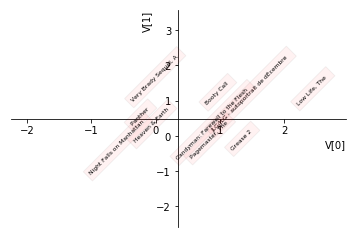

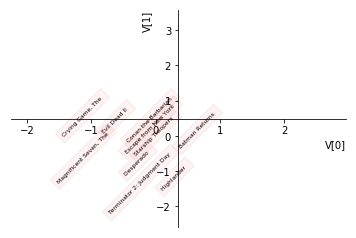

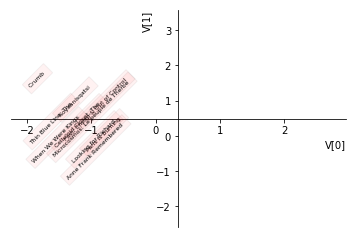

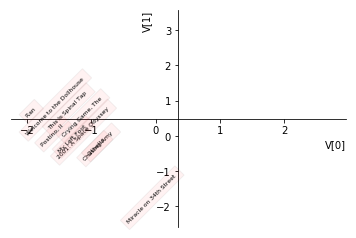

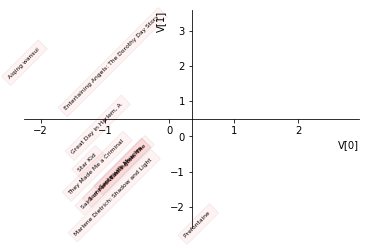

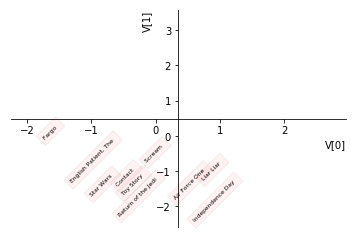

In [56]:
## perform SVD to V and get the A, Sigma, B
U = UT.transpose()
V = VT.transpose()
Vp = np.zeros_like(V)
V_row_means = np.mean(V, axis=1)
for irow in range(len(V)):
    Vp[irow] = V[irow] - V_row_means[irow]
A, S, B =  np.linalg.svd(Vp)
A12 = A[:,[0,1]]
A12T = A12.transpose()
Vtilt = np.matmul(A12T, V)

## visualize the movies of choices
visualize_V(Vtilt, id_random10, name_random10, 'visualize_V_random10movies')
visualize_V(Vtilt, id_random10_action, name_random10_action, 'visualize_V_random10movies_action')
visualize_V(Vtilt, id_random10_documentary, name_random10_documentary, 'visualize_V_random10movies_documentary')
visualize_V(Vtilt, id_random10_drama, name_random10_drama, 'visualize_V_random10movies_drama')
visualize_V(Vtilt, id_best_10, name_best_10, 'visualize_V_best10movies')
visualize_V(Vtilt, id_most_popular_10, name_most_popular_10, 'visualize_V_mostpopular10movies')

## task 2: add bias term

In [20]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT_bias, VT_bias, a_bias, b_bias, e_in = train_model_bias(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err_bias(UT_bias, VT_bias, Y_test, a_bias, b_bias)

Initial error = 6.947816824857345
After epoch: 0, error = 0.5519758254484559, eps = 0.9205540618927026
After epoch: 1, error = 0.4467323792310318, eps = 0.016454981639967413
After epoch: 2, error = 0.43558438104583846, eps = 0.0017430073990619317
After epoch: 3, error = 0.40588727394480245, eps = 0.004643190333183807
After epoch: 4, error = 0.3950290381769209, eps = 0.0016977025802994573
After epoch: 5, error = 0.3841357439334291, eps = 0.0017031840291993824
After epoch: 6, error = 0.37770868325778, eps = 0.0010048812464604848
After epoch: 7, error = 0.36556564836185496, eps = 0.001898582984950271
After epoch: 8, error = 0.3597529643428895, eps = 0.0009088224706497031
After epoch: 9, error = 0.34902631211872714, eps = 0.0016771292821622253
After epoch: 10, error = 0.3490906018688325, eps = 1.0051805557909211e-05
After epoch: 11, error = 0.3422099521108912, eps = 0.0010758006270914489
After epoch: 12, error = 0.3327869303529854, eps = 0.0014733045675739457
After epoch: 13, error = 0.327

After epoch: 112, error = 0.29012033299479273, eps = 0.0006668425767528662
After epoch: 113, error = 0.292748575444257, eps = 0.00041092992300889776
After epoch: 114, error = 0.28846553658556867, eps = 0.0006696599960949854
After epoch: 115, error = 0.29171645511937233, eps = 0.0005082863276469995
After epoch: 116, error = 0.28940115358345464, eps = 0.000362001109178867
After epoch: 117, error = 0.2910266278651723, eps = 0.00025414551141404127
After epoch: 118, error = 0.2908723929223381, eps = 2.411488072459666e-05
After epoch: 119, error = 0.28532029242720075, eps = 0.0008680798186900606
After epoch: 120, error = 0.2889217093138861, eps = 0.0005630873073639897
After epoch: 121, error = 0.2839485648478812, eps = 0.0007775591148160985
After epoch: 122, error = 0.2904431218567911, eps = 0.0010154344064385152
After epoch: 123, error = 0.2829682053588046, eps = 0.0011687151851769492
After epoch: 124, error = 0.2858390719497658, eps = 0.0004488645967319271
After epoch: 125, error = 0.28651

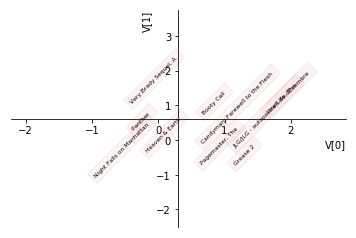

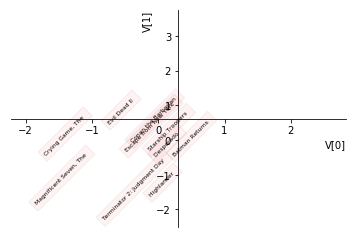

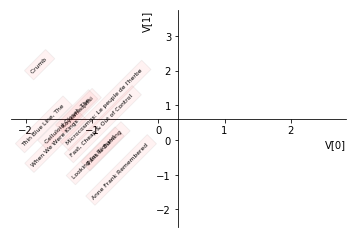

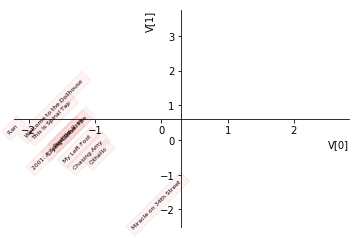

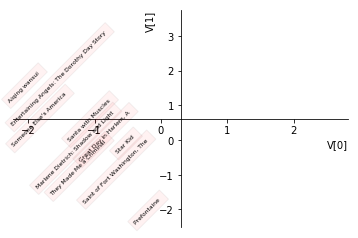

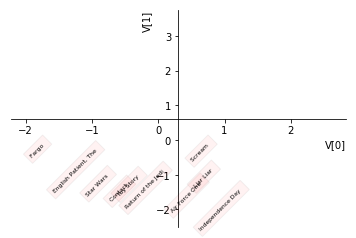

In [52]:
## perform SVD to V and get the A, Sigma, B
U_bias = UT_bias.transpose()
V_bias = VT_bias.transpose()
Vp_bias = np.zeros_like(V_bias)
V_bias_row_means = np.mean(V_bias, axis=1)
for irow in range(len(V)):
    Vp_bias[irow] = V_bias[irow] - V_bias_row_means[irow]
A_bias, S_bias, B_bias =  np.linalg.svd(Vp_bias)
A12_bias = A_bias[:,[0,1]]
A12T_bias = A12_bias.transpose()
Vtilt_bias = np.matmul(A12T_bias, V_bias)

## visualize the movies of choices
visualize_V(Vtilt_bias, id_random10, name_random10, 'visualize_V_bias_random10movies')
visualize_V(Vtilt_bias, id_random10_action, name_random10_action, 'visualize_V_bias_random10movies_action')
visualize_V(Vtilt_bias, id_random10_documentary, name_random10_documentary, 'visualize_V_bias_random10movies_documentary')
visualize_V(Vtilt_bias, id_random10_drama, name_random10_drama, 'visualize_V_bias_random10movies_drama')
visualize_V(Vtilt_bias, id_best_10, name_best_10, 'visualize_V_bias_best10movies')
visualize_V(Vtilt_bias, id_most_popular_10, name_most_popular_10, 'visualize_V_bias_mostpopular10movies')